In [1]:
#Standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
import pickle
# from copy import deepcopy
warnings.filterwarnings('ignore')

# Own modules and libraries
import estimators.v_information as v_information
import source.utils as ut
import source.pipes as op
import source.fairness as fm

# Plot
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
data_sets = {}

DIR_DATA = {
    'dutch_census': 'data/dutch_census/',
    'census_income':'data/census_income/',
    'compas': 'data/compas/',
    'credit_card': 'data/credit_card/'
}

data_names = {    
    'dutch_census': 'DC',
    'census_income':'CI',
    'compas': 'CR',
    'credit_card': 'CC'
    }

model_names={
    'sgd_lr':'Linear', 
    'mlp_one_layer': '1MLP', 
    'mlp_two_layer':'2MLP',
    'mlp_three_layer': '3MLP'
}

for data in DIR_DATA:
    with open (DIR_DATA[data]+data+'.pkl', 'rb') as f:
        dic = pickle.load(f)
    
    data_sets[data] = dic

# Computing Predictive Information

In [62]:
print('I_v(X->S)')
for ds in data_names:
    print(ds)
    for model in model_names:
        v_s_info_scores = pickle.load(open(f'v_info_scores/{model}/{ds}_s_v_info.pkl', 'rb'))
        pve_s = v_s_info_scores['pve_s'][0]
        pve_s_x = v_s_info_scores['pve_s_x'][0]
        I_s_from_x = sum(pve_s-pve_s_x)/len(pve_s)
        print(f'>{model}: {I_s_from_x}')
    print()

print('====')
print()
print('I_v(X->Y)')
for ds in data_names:
    print(ds)
    for model in model_names:
        v_y_info_scores = pickle.load(open(f'v_info_scores/{model}/{ds}_v_info.pkl', 'rb'))
        pve_y = v_y_info_scores['pve_y'][0]
        pve_y_x = v_y_info_scores['pve_y_x'][0]
        I_y_from_x = sum(pve_y - pve_y_x)/len(pve_y)
        print(f'>{model}: {I_y_from_x}')
    print()


I_v(X->S)
dutch_census
>sgd_lr: 0.05977503217786882
>mlp_one_layer: 0.09934324911363966
>mlp_two_layer: 0.0989625378440748
>mlp_three_layer: 0.10307174526481723

census_income
>sgd_lr: 0.18491453493610902
>mlp_one_layer: 0.3172140033240256
>mlp_two_layer: 0.31290149247327026
>mlp_three_layer: 0.3102927803406069

compas
>sgd_lr: 0.04172173279725163
>mlp_one_layer: 0.04613260318079834
>mlp_two_layer: 0.0461438025757648
>mlp_three_layer: 0.04628102694494757

credit_card
>sgd_lr: 0.00975810120488926
>mlp_one_layer: 0.023734793558854786
>mlp_two_layer: 0.02191791299412279
>mlp_three_layer: 0.024853888950173236

====

I_v(X->Y)
dutch_census
>sgd_lr: 0.23919598836682443
>mlp_one_layer: 0.2844035562044021
>mlp_two_layer: 0.28567101174824466
>mlp_three_layer: 0.28414866182645937

census_income
>sgd_lr: 0.15883537609368004
>mlp_one_layer: 0.23130282393449472
>mlp_two_layer: 0.2288306058378983
>mlp_three_layer: 0.24862342336140564

compas
>sgd_lr: 0.09655640818836236
>mlp_one_layer: 0.10567588708

# Analyzing Disparities

In [63]:
cols = ['model', 'dataset', 'id_scenario', 'acc_train_mean', 'acc_train_sd', 'acc_test',
        'f1_train_mean', 'f1_train_sd', 'f1_test', 'log_loss_train_mean' ,
        'log_loss_train_sd', 'log_loss_test', 'demp', 'eqopp', 'eqodd']

performances_disparities = pd.DataFrame(columns = cols)

for ds in DIR_DATA.keys():
    for m in model_names:
        perfos = pd.read_csv(f'results/{m}/{ds}_results.txt')
        perfos['model'] = [m]*perfos.shape[0]
        perfos['dataset'] = [ds]*perfos.shape[0]
        performances_disparities = pd.concat([performances_disparities, perfos], axis=0, ignore_index=True)

performances_disparities

,model,dataset,id_scenario,acc_train_mean,acc_train_sd,acc_test,f1_train_mean,f1_train_sd,f1_test,log_loss_train_mean,log_loss_train_sd,log_loss_test,demp,eqopp,eqodd
0,sgd_lr,dutch_census,0,0.800373,0.003660,0.804259,0.812913,0.003490,0.820935,0.454481,0.004726,0.453729,-0.183724,-0.044865,0.048410
1,sgd_lr,dutch_census,1,0.800350,0.003611,0.804259,0.812886,0.003437,0.820935,0.454481,0.004727,0.453728,-0.183724,-0.044865,0.048410
2,sgd_lr,dutch_census,2,0.800279,0.003746,0.804204,0.812806,0.003621,0.820929,0.454489,0.004716,0.453756,-0.183828,-0.044727,0.048090
3,sgd_lr,dutch_census,3,0.800373,0.003596,0.804259,0.812913,0.003429,0.820935,0.454487,0.004720,0.453746,-0.183724,-0.044865,0.048410
4,sgd_lr,dutch_census,4,0.799972,0.003599,0.804149,0.812625,0.003292,0.821032,0.454674,0.004697,0.453976,-0.183256,-0.044633,0.048584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,mlp_three_layer,credit_card,157,0.811714,0.003352,0.816778,0.421867,0.025664,0.465478,0.456355,0.007817,0.444419,0.021214,0.001135,0.008412
1364,mlp_three_layer,credit_card,158,0.816905,0.002657,0.819556,0.460303,0.005665,0.478149,0.446852,0.005628,0.437454,0.014865,0.009263,0.000387
1365,mlp_three_layer,credit_card,159,0.818000,0.004913,0.820889,0.483839,0.020031,0.476623,0.441969,0.009433,0.436201,0.015618,0.001533,0.004725
1366,mlp_three_layer,credit_card,160,0.816857,0.004094,0.818444,0.478267,0.020687,0.480610,0.457587,0.009167,0.452285,0.021189,0.001260,0.007255


In [64]:
results = pd.DataFrame()
for ds in DIR_DATA.keys():
    print(f'>ds: {ds}')
    for model_name in ['sgd_lr', 'mlp_one_layer', 'mlp_two_layer', 'mlp_three_layer']:
        # print(f'>>model: {model_name}')
        best_10_perc = performances_disparities[(performances_disparities['model']==model_name)&(performances_disparities['dataset']==ds)]['acc_test'].quantile(0.75)
        if best_10_perc:
            filtered_best = performances_disparities[(performances_disparities['model']==model_name)&(performances_disparities['dataset']==ds)&(performances_disparities['acc_test']>=best_10_perc)]
            results = pd.concat([results, pd.DataFrame({'dataset': ds,
                                                        'model': model_name,
                                                        'acc_test': filtered_best['acc_test'].mean(),
                                                        'demp': abs(filtered_best['demp']).mean()}, index=[0])], axis=0, ignore_index=True)
            # print(f"acc_test: {filtered_best['acc_test'].mean()}, demp: {filtered_best['demp'].mean()}")
results

>ds: dutch_census
>ds: census_income
>ds: compas
>ds: credit_card


,dataset,model,acc_test,demp
0,dutch_census,sgd_lr,0.804613,0.186204
1,dutch_census,mlp_one_layer,0.821461,0.195560
2,dutch_census,mlp_two_layer,0.821752,0.191743
3,dutch_census,mlp_three_layer,0.822139,0.192809
4,census_income,sgd_lr,0.820367,0.132437
5,census_income,mlp_one_layer,0.851078,0.176372
6,census_income,mlp_two_layer,0.850882,0.169060
7,census_income,mlp_three_layer,0.851043,0.168309
8,compas,sgd_lr,0.687903,0.198812
9,compas,mlp_one_layer,0.692471,0.210712


FOR: sgd_lr
FOR: mlp_one_layer
FOR: mlp_two_layer
FOR: mlp_three_layer
0.9946623634558093


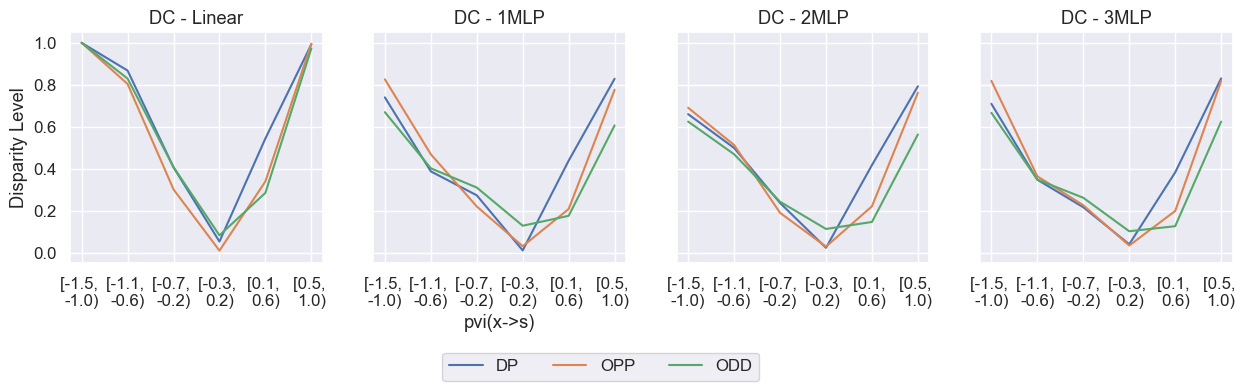

FOR: sgd_lr
FOR: mlp_one_layer
FOR: mlp_two_layer
FOR: mlp_three_layer
0.9860420121614151


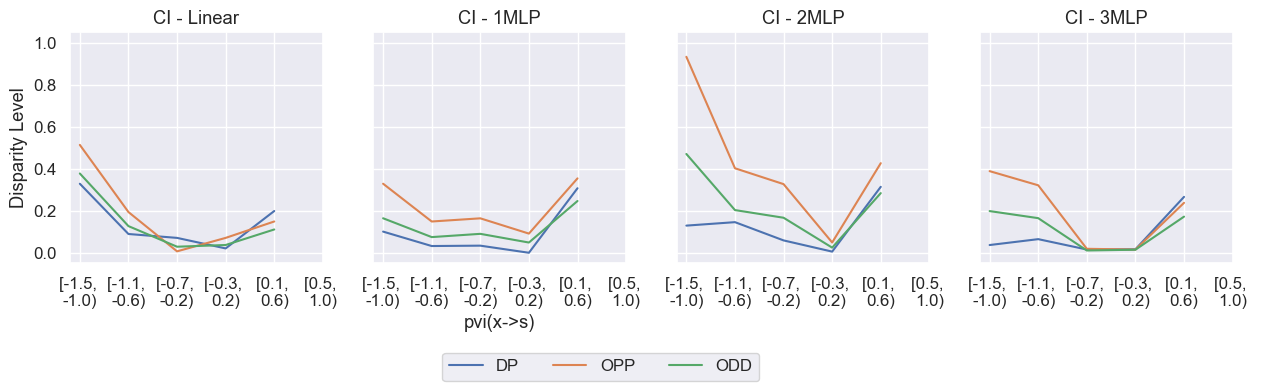

FOR: sgd_lr
FOR: mlp_one_layer
FOR: mlp_two_layer
FOR: mlp_three_layer
0.9996535796766745


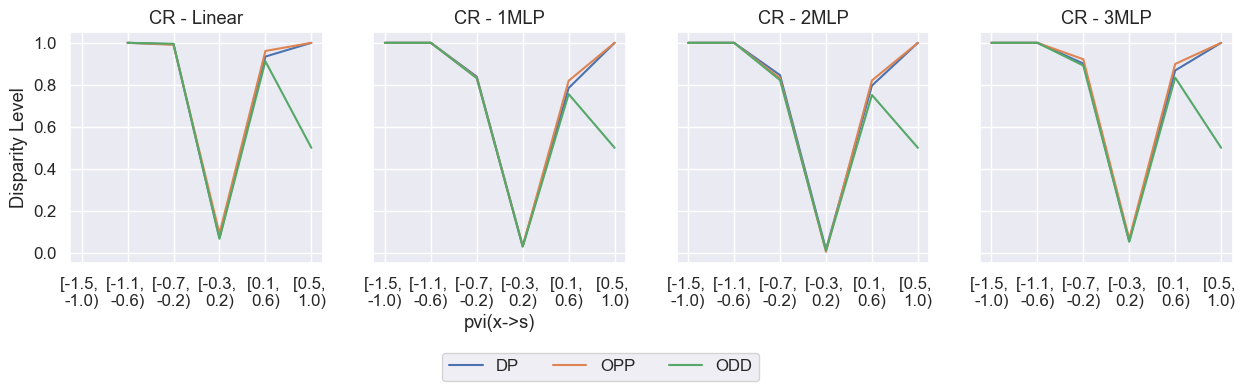

FOR: sgd_lr
FOR: mlp_one_layer
FOR: mlp_two_layer
FOR: mlp_three_layer
0.9997222222222222


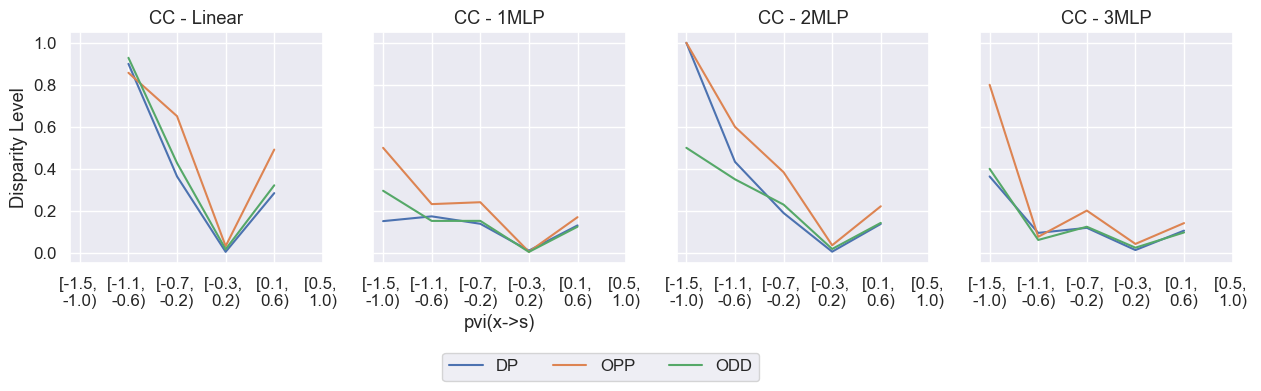

In [65]:
lim_upper_threshold = {
    'DC': 1.1,
    'CI': 1.1,
    'CR': 1.1,
    'CC': 1.1
}

lim_lower_threshold = {
    'DC': -1.5,
    'CI': -1.5,
    'CR': -1.5,
    'CC': -1.5
}


for mn in model_names:
    performances_disparities['model'] = performances_disparities['model'].replace(mn, model_names[mn])

for dn in data_names:
    performances_disparities['dataset'] = performances_disparities['dataset'].replace(dn, data_names[dn])

step = .3
overlap = .2

sns.color_palette()
for ds in data_names.keys():
    ds_eq = data_names[ds]

    fig, axis = plt.subplots(1,4, figsize=(15,3), sharex=True, sharey=True)
    sns.set(font_scale=1.1)

    col = 0
    
    prom_total = 0
    for m in ['sgd_lr', 'mlp_one_layer', 'mlp_two_layer', 'mlp_three_layer']:
        print(f'FOR: {m}')

        high_bound = lim_upper_threshold[ds_eq]
        low_bound = lim_lower_threshold[ds_eq]
        
        length_range = step+overlap
        
        id_best = performances_disparities[(performances_disparities['model']==model_names[m])&(performances_disparities['dataset']==ds_eq)&(performances_disparities['acc_test']==performances_disparities[(performances_disparities['model']==model_names[m])&(performances_disparities['dataset']==ds_eq)].acc_test.max())]['id_scenario'].iloc[0]
        pred_test_original = pickle.load(open(f'predictions/{m}/{ds}_predictions.pkl', 'rb'))[id_best]['test']
        _, S_test_original, Y_test_original = data_sets[ds]['test']

        metric_pve_or = np.array(pd.read_csv(f'pvi_results/{m}/{ds}/pvi_s_from_x.txt')['pve'])
        
        S_test = S_test_original[np.where((metric_pve_or>=low_bound) & (metric_pve_or<=high_bound))[0]]
        Y_test = Y_test_original[np.where((metric_pve_or>=low_bound) & (metric_pve_or<=high_bound))[0]]
        pred_test = pred_test_original[np.where((metric_pve_or>=low_bound) & (metric_pve_or<=high_bound))[0]]
        metric_pve = metric_pve_or[np.where((metric_pve_or>=low_bound) & (metric_pve_or<=high_bound))[0]]
        
        prom_total += len(metric_pve)/len(metric_pve_or)

        freq_overall = []
        freq_unpr = []
        freq_pr = []
        thresholds = []
        thresholds_not_filtered = []

        unpr_rate = []
        demp_overall = []
        eqodd_overall = []
        eqopp_overall = []
        selection_rate_all = []
        error_unpr_rate_all = []
        error_priv_rate_all = []
        # acc_selected = []
        for r in range(int(low_bound*10), int(high_bound*10+1), int(step*15)):
            thr = r/10
            if (thr+length_range)>high_bound:continue
            thresholds_not_filtered.append(thr)
            selected = (metric_pve_or>=thr) & (metric_pve_or<(thr+length_range))
            freq_overall.append(sum(selected)/len(metric_pve_or))
            freq_unpr.append(sum(selected & (S_test_original==1))/sum(selected))
            freq_pr.append(sum(selected & (S_test_original==0))/sum(selected))
            selection_rate_all.append(sum(pred_test_original[selected])/sum(selected))
            
            if sum(selected)==0: continue
            if sum(pred_test_original[selected])/sum(selected) == 0.0 or sum(pred_test_original[selected])/sum(selected) == 1.0: continue
            if sum(selected & (S_test_original==1))==0 or sum(selected & (S_test_original==0))==0: continue


            thresholds.append(thr)
            demp_overall.append(abs(fm.demographic_parity_dif(pred_test_original[selected],S_test_original[selected],1)))
            eqodd_overall.append(abs(fm.equal_odd_dif(Y_test_original[selected],pred_test_original[selected],S_test_original[selected],1)))
            eqopp_overall.append(abs(fm.equal_opp_dif(Y_test_original[selected],pred_test_original[selected],S_test_original[selected],1)))
            

        axis[col].plot(thresholds, demp_overall, label='DP')
        axis[col].plot(thresholds, eqopp_overall,  label='OPP')
        axis[col].plot(thresholds, eqodd_overall, label='ODD')

        axis[col].set_xticks(np.array([x/10 for x in  range(int(low_bound*10), int(high_bound*10+1), int(step*15))])[list(range(0,len(thresholds_not_filtered)))], 
                    np.array(['['+str(x)+', \n'+str(round(x+length_range,1))+')' for x in thresholds_not_filtered])[list(range(0, len(thresholds_not_filtered)))])

        axis[col].set_title(f'{ds_eq} - {model_names[m]}')
        axis[col].set_ylim((-0.05, 1.05))

        if col==1:
            axis[col].set_xlabel('pvi(x->s)')
        if col==0:
            axis[col].set_ylabel('Disparity Level')
        
        if col<3:
            col+=1
        else:
            col=0
    print(prom_total/4)
    
    plt.legend(loc='upper center', bbox_to_anchor=(-1.5, -0.35), ncol=4)
    plt.show()

## Features

### COMPAS

In [69]:
ds = 'compas'
model = 'mlp_one_layer'
id_best = performances_disparities[(performances_disparities['model']==model_names[model])
                                   &(performances_disparities['dataset']==data_names[ds])
                                   &(performances_disparities['acc_test']==performances_disparities[(performances_disparities['model']==model_names[model])
                                                                                                    &(performances_disparities['dataset']==data_names[ds])].acc_test.max())]['id_scenario'].iloc[0]
metric_pve_or = np.array(pd.read_csv(f'pvi_results/{model}/{ds}/pvi_s_from_x.txt')['pve'])
pred_test_original = pickle.load(open(f'predictions/{model}/{ds}_predictions.pkl', 'rb'))[id_best]['test']
ds_compas = pd.read_csv('data/compas/compas_test.csv')
compas_col = list(ds_compas.columns)
ds_compas = pd.concat([ds_compas, pd.DataFrame({'pve': metric_pve_or}), pd.DataFrame({'prediction': pred_test_original})], axis=1, ignore_index=True)
ds_compas.columns = compas_col + ['pve'] + ['prediction']
filtered_compas = ds_compas.iloc[np.where((metric_pve_or>=low_bound)&(metric_pve_or<high_bound))[0],:]

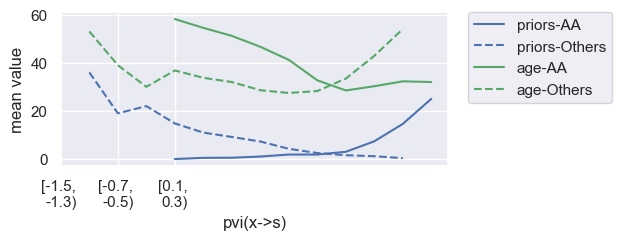

In [70]:
priors_count_bins_AA = []
priors_count_bins_notAA = []
age_bins_AA = []
age_bins_notAA = []
juv_misd_count_bins_AA = []
juv_misd_count_bins_notAA = []

low_bound = -20
high_bound = 20
step = 2

sns.set(font_scale=1.)
sns.set(rc={'figure.figsize': (5, 2)})

for f in range(low_bound, high_bound, step):
    thr = f/10
    selected_AA = (filtered_compas['pve']>=thr) * (filtered_compas['pve']<thr+step/10) * (filtered_compas['race']=='African-American')
    selected_notAA = (filtered_compas['pve']>=thr) * (filtered_compas['pve']<thr+step/10) * (filtered_compas['race']!='African-American')
    priors_count_bins_AA.append(filtered_compas[selected_AA]['priors_count'].mean())
    priors_count_bins_notAA.append(filtered_compas[selected_notAA]['priors_count'].mean())
    age_bins_AA.append(filtered_compas[selected_AA]['age'].mean())
    age_bins_notAA.append(filtered_compas[selected_notAA]['age'].mean())
    juv_misd_count_bins_AA.append(filtered_compas[selected_AA]['juv_misd_count'].mean())
    juv_misd_count_bins_notAA.append(filtered_compas[selected_notAA]['juv_misd_count'].mean())

plt.plot(np.array([x/10 for x in range(low_bound, high_bound, step)]), 
         priors_count_bins_AA, label='priors-AA', color='b', linestyle='-')
plt.plot(np.array([x/10 for x in range(low_bound, high_bound, step)]),
         priors_count_bins_notAA, label='priors-Others', color='b', linestyle='--')
plt.plot(np.array([x/10 for x in range(low_bound, high_bound, step)]),
         age_bins_AA, label='age-AA', color='g', linestyle='-')
plt.plot(np.array([x/10 for x in range(low_bound, high_bound, step)]),
         age_bins_notAA, label='age-Others', color='g', linestyle='--')
# plt.plot(np.array([x/10 for x in range(low_bound, high_bound, step)]),
#          juv_misd_count_bins_AA, label='juv_misd_count-AA', color='y', linestyle='-')
# plt.plot(np.array([x/10 for x in range(low_bound, high_bound, step)]),
#          juv_misd_count_bins_notAA, label='juv_misd_count-Others', color='y', linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('pvi(x->s)')
plt.ylabel('mean value')
plt.xticks(np.array([x/10 for x in  range(int(low_bound), int(high_bound+1), 2)])[list(range(0,len(thresholds),2))], 
                    np.array(['['+str(x)+', \n'+str(round(x+.2,1))+')' for x in thresholds])[list(range(0, len(thresholds), 2))])
plt.show()

## Predictive Information for each Feature

### COMPAS

In [20]:
#Importa features
model = 'mlp_one_layer'
ds = 'compas'
numerical, nominal = data_sets[ds]['features'][0], data_sets[ds]['features'][1]
features = numerical + nominal

v_s_info_scores = pickle.load(open(f'v_info_scores/{model}/{ds}_s_v_info.pkl', 'rb'))
v_y_info_scores = pickle.load(open(f'v_info_scores/{model}/{ds}_v_info.pkl', 'rb'))

pve_s = v_s_info_scores['pve_s'][0]
pve_s_x = v_s_info_scores['pve_s_x'][0]
I_s_from_x = pve_s-pve_s_x

pve_y = v_y_info_scores['pve_y'][0]
pve_y_x = v_y_info_scores['pve_y_x'][0]
I_y_from_x = pve_y - pve_y_x

results = pd.DataFrame(columns = ['feature', 's_wo', 's_only', 'y_only'])
for f in features:
    pve_s_from_x_wo_f = v_s_info_scores['v_pve_s_wo_feature_model_features'][f][0]
    I_s_from_x_wo_f = pve_s_from_x_wo_f-pve_s_x

    pve_s_from_x_only_f = v_s_info_scores['v_pve_s_with_feature_models_features'][f][0]
    I_s_from_x_with_f = pve_s-pve_s_from_x_only_f

    pve_y_from_x_only_f = v_y_info_scores['v_pve_y_with_feature_models_features'][f][0]
    I_y_from_x_only_f = pve_y-pve_y_from_x_only_f

    pve_y_from_x_wo_f = v_y_info_scores['v_pve_y_wo_feature_models_features'][f][0]
    I_y_from_x_wo_f = pve_y_from_x_wo_f-pve_y_x

    results = pd.concat([results, pd.DataFrame({'feature': [f], 
                                                's_wo': [I_s_from_x_wo_f.mean()], 
                                                's_only': [I_s_from_x_with_f.mean()],
                                                'y_wo': [I_y_from_x_wo_f.mean()],
                                                'y_only': [I_y_from_x_only_f.mean()]})], axis=0, ignore_index=True)
    
results.sort_values(by='y_only', ascending=False)

,feature,s_wo,s_only,y_only,y_wo
4,priors_count,0.023828,0.026299,0.061077,0.060987
0,age,0.000964,0.009463,0.019351,0.010334
7,age_cat,0.000969,0.007833,0.013061,0.001065
5,c_days_jail,0.000465,0.001198,0.012210,0.002292
2,juv_misd_count,0.000237,0.006957,0.010153,-0.000208
3,juv_other_count,0.000125,0.001687,0.009291,0.002265
1,juv_fel_count,0.000223,0.005074,0.006985,-0.000330
8,c_charge_degree,0.000710,0.002988,0.006069,0.000305
6,sex,0.000243,-0.000297,0.003636,0.002099


### Dutch Census

In [3]:
#Importance features
model = 'mlp_two_layer'
ds = 'dutch_census'
numerical, nominal = data_sets[ds]['features'][0], data_sets[ds]['features'][1]
features = numerical + nominal

v_s_info_scores = pickle.load(open(f'v_info_scores/{model}/{ds}_s_v_info.pkl', 'rb'))
v_y_info_scores = pickle.load(open(f'v_info_scores/{model}/{ds}_v_info.pkl', 'rb'))

pve_s = v_s_info_scores['pve_s'][0]
pve_s_x = v_s_info_scores['pve_s_x'][0]
I_s_from_x = pve_s-pve_s_x

pve_y = v_y_info_scores['pve_y'][0]
pve_y_x = v_y_info_scores['pve_y_x'][0]
I_y_from_x = pve_y - pve_y_x

results = pd.DataFrame()
for f in features:
    pve_s_from_x_wo_f = v_s_info_scores['v_pve_s_wo_feature_model_features'][f][0]
    I_s_from_x_wo_f = pve_s_from_x_wo_f-pve_s_x

    pve_s_from_x_only_f = v_s_info_scores['v_pve_s_with_feature_models_features'][f][0]
    I_s_from_x_with_f = pve_s-pve_s_from_x_only_f

    pve_y_from_x_only_f = v_y_info_scores['v_pve_y_with_feature_models_features'][f][0]
    I_y_from_x_only_f = pve_y-pve_y_from_x_only_f

    pve_y_from_x_wo_f = v_y_info_scores['v_pve_y_wo_feature_models_features'][f][0]
    I_y_from_x_wo_f = pve_y_from_x_wo_f-pve_y_x

    results = pd.concat([results, pd.DataFrame({'feature': [f], 
                                                's_wo': [I_s_from_x_wo_f.mean()], 
                                                's_only': [I_s_from_x_with_f.mean()],
                                                'y_wo': [I_y_from_x_wo_f.mean()],
                                                'y_only': [I_y_from_x_only_f.mean()]})], axis=0, ignore_index=True)
    
results.sort_values(by='s_only', ascending=False)

,feature,s_wo,s_only,y_wo,y_only
8,cur_eco_activity,0.052460,0.044484,0.018890,0.058276
0,age,0.023250,0.008986,0.006744,0.060432
6,edu_level,0.023901,0.008462,0.146180,0.187080
1,household_position,0.000281,0.008430,-0.000001,0.038772
9,Marital_status,-0.002876,0.004236,-0.001188,0.015539
7,economic_status,0.002615,0.003103,0.035000,0.060454
2,household_size,-0.001663,0.001850,0.000426,0.000725
5,country_birth,-0.002662,0.000201,0.000003,0.001266
4,citizenship,-0.000841,0.000096,-0.000004,0.000537
3,prev_residence_place,-0.001465,0.000077,0.000127,0.000354


### Census Income

In [6]:
#Importance features
model = 'mlp_one_layer'
ds = 'census_income'
numerical, nominal = data_sets[ds]['features'][0], data_sets[ds]['features'][1]
features = numerical + nominal

v_s_info_scores = pickle.load(open(f'v_info_scores/{model}/{ds}_s_v_info.pkl', 'rb'))
v_y_info_scores = pickle.load(open(f'v_info_scores/{model}/{ds}_v_info.pkl', 'rb'))

pve_s = v_s_info_scores['pve_s'][0]
pve_s_x = v_s_info_scores['pve_s_x'][0]
I_s_from_x = pve_s-pve_s_x

pve_y = v_y_info_scores['pve_y'][0]
pve_y_x = v_y_info_scores['pve_y_x'][0]
I_y_from_x = pve_y - pve_y_x

#TODO: add without y
results = pd.DataFrame(columns = ['feature', 's_wo', 's_only', 'y_only']) #'y_wo'
for f in features:
    pve_s_from_x_wo_f = v_s_info_scores['v_pve_s_wo_feature_model_features'][f][0]
    I_s_from_x_wo_f = pve_s_from_x_wo_f-pve_s_x

    pve_s_from_x_only_f = v_s_info_scores['v_pve_s_with_feature_models_features'][f][0]
    I_s_from_x_with_f = pve_s-pve_s_from_x_only_f

    pve_y_from_x_only_f = v_y_info_scores['v_pve_y_with_feature_models_features'][f][0]
    I_y_from_x_only_f = pve_y-pve_y_from_x_only_f

    pve_y_from_x_wo_f = v_y_info_scores['v_pve_y_wo_feature_models_features'][f][0]
    I_y_from_x_wo_f = pve_y_from_x_wo_f-pve_y_x

    results = pd.concat([results, pd.DataFrame({'feature': [f], 
                                                's_wo': [I_s_from_x_wo_f.mean()], 
                                                's_only': [I_s_from_x_with_f.mean()],
                                                'y_wo': [I_y_from_x_wo_f.mean()],
                                                'y_only': [I_y_from_x_only_f.mean()]})], axis=0, ignore_index=True)
    
results.sort_values(by='s_only', ascending=False)

,feature,s_wo,s_only,y_only,y_wo
9,relationship,0.127987,0.266927,0.114258,0.000384
7,marital-status,0.000573,0.107721,0.109411,0.000655
8,occupation,0.029594,0.055483,0.053868,0.000876
4,hours-per-week,0.003506,0.034354,0.038311,0.006293
5,workclass,0.007701,0.010554,0.013970,-0.000236
0,age,0.001965,0.008912,0.064954,0.009222
10,race,0.001203,0.004945,0.004072,-0.001073
1,education-num,0.003083,0.002965,0.060675,0.009736
2,capital-gain,0.000891,0.002792,0.054312,0.030448
6,education,0.001000,0.001198,0.055037,-0.000699


### Credit Card

In [7]:
#Importance features
model = 'mlp_one_layer'
ds = 'credit_card'
numerical, nominal = data_sets[ds]['features'][0], data_sets[ds]['features'][1]
features = numerical + nominal

v_s_info_scores = pickle.load(open(f'v_info_scores/{model}/{ds}_s_v_info.pkl', 'rb'))
v_y_info_scores = pickle.load(open(f'v_info_scores/{model}/{ds}_v_info.pkl', 'rb'))

pve_s = v_s_info_scores['pve_s'][0]
pve_s_x = v_s_info_scores['pve_s_x'][0]
I_s_from_x = pve_s-pve_s_x

pve_y = v_y_info_scores['pve_y'][0]
pve_y_x = v_y_info_scores['pve_y_x'][0]
I_y_from_x = pve_y - pve_y_x

#TODO: add without y
results = pd.DataFrame(columns = ['feature', 's_wo', 's_only', 'y_only']) #'y_wo'
for f in features:
    pve_s_from_x_wo_f = v_s_info_scores['v_pve_s_wo_feature_model_features'][f][0]
    I_s_from_x_wo_f = pve_s_from_x_wo_f-pve_s_x

    pve_s_from_x_only_f = v_s_info_scores['v_pve_s_with_feature_models_features'][f][0]
    I_s_from_x_with_f = pve_s-pve_s_from_x_only_f

    pve_y_from_x_only_f = v_y_info_scores['v_pve_y_with_feature_models_features'][f][0]
    I_y_from_x_only_f = pve_y-pve_y_from_x_only_f

    pve_y_from_x_wo_f = v_y_info_scores['v_pve_y_wo_feature_models_features'][f][0]
    I_y_from_x_wo_f = pve_y_from_x_wo_f-pve_y_x

    results = pd.concat([results, pd.DataFrame({'feature': [f], 
                                                's_wo': [I_s_from_x_wo_f.mean()], 
                                                's_only': [I_s_from_x_with_f.mean()],
                                                'y_wo': [I_y_from_x_wo_f.mean()],
                                                'y_only': [I_y_from_x_only_f.mean()]})], axis=0, ignore_index=True)
    
results.sort_values(by='s_only', ascending=False)

,feature,s_wo,s_only,y_only,y_wo
0,LIMIT_BAL,0.010785,0.007198,0.012578,0.003902
1,AGE,0.014596,0.003195,0.001084,0.006858
18,PAY_3,0.003804,0.002039,0.036065,0.010656
17,PAY_2,0.001785,0.001955,0.048166,0.007274
16,PAY_0,0.002349,0.001309,0.074669,0.026982
19,PAY_4,0.000121,0.001227,0.030164,0.007073
4,BILL_AMT3,0.000896,0.000256,-0.000031,0.006672
3,BILL_AMT2,0.002339,0.000226,-0.002191,0.003142
21,PAY_6,0.001039,0.000207,0.025808,0.009051
9,PAY_AMT2,0.003288,-0.000097,0.006473,0.007317
